In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape
# x_train - 50000 samples, each is 32x32 image & 3 is rgb channels

(50000, 32, 32, 3)

In [51]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [50]:
y_train[0]

6

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
y_train[0]

6

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [32]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

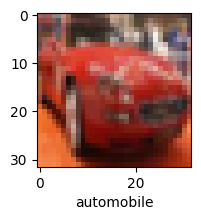

In [33]:
plot_sample(x_train, y_train, 5)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [49]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=,batch_size=100)

Epoch 1/5
500/500 [==============================] - 72s 142ms/step - loss: 2.0419 - accuracy: 0.3131
Epoch 2/5
500/500 [==============================] - 71s 142ms/step - loss: 1.6637 - accuracy: 0.4034
Epoch 3/5
500/500 [==============================] - 70s 140ms/step - loss: 1.5727 - accuracy: 0.4382
Epoch 4/5
500/500 [==============================] - 71s 143ms/step - loss: 1.5135 - accuracy: 0.4601
Epoch 5/5
500/500 [==============================] - 68s 137ms/step - loss: 1.4625 - accuracy: 0.4767


In [17]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4586 - accuracy: 0.4869


[1.4585683345794678, 0.4869000017642975]

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
# import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.55      1000
           1       0.57      0.65      0.61      1000
           2       0.40      0.28      0.33      1000
           3       0.35      0.36      0.36      1000
           4       0.38      0.38      0.38      1000
           5       0.41      0.35      0.38      1000
           6       0.51      0.55      0.53      1000
           7       0.47      0.64      0.54      1000
           8       0.65      0.57      0.61      1000
           9       0.55      0.53      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [22]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])


In [23]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.5068 - accuracy: 0.4578
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1860 - accuracy: 0.5832
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0569 - accuracy: 0.6341
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9781 - accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9151 - accuracy: 0.6811
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8650 - accuracy: 0.7007
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8247 - accuracy: 0.7130
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7894 - accuracy: 0.7255
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7560 - accuracy: 0.7366
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [25]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9282 - accuracy: 0.6858


[0.9282344579696655, 0.6858000159263611]

In [27]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [34]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

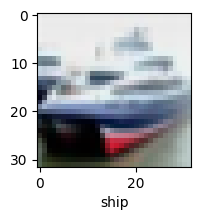

In [35]:
plot_sample(x_test, y_test, 1)

In [37]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[2.78615807e-05, 2.52935642e-05, 6.19140407e-03, 9.16492164e-01,
        1.17423304e-04, 9.08755232e-03, 8.92150681e-04, 4.34282323e-04,
        6.67189062e-02, 1.30478293e-05],
       [2.49530817e-03, 3.25275332e-01, 1.03035918e-05, 2.48306492e-07,
        7.01395550e-07, 1.19490746e-08, 8.99578301e-10, 3.35946453e-07,
        6.70594513e-01, 1.62327511e-03],
       [7.12397099e-02, 1.72598958e-01, 4.77745384e-03, 4.20314912e-03,
        1.06082400e-02, 4.60653275e-04, 4.17102001e-06, 2.22389735e-02,
        5.65266371e-01, 1.48602426e-01],
       [9.01103437e-01, 1.09914248e-03, 9.20602214e-03, 1.49096813e-04,
        4.78976686e-03, 1.20646393e-06, 6.78840843e-06, 1.56342154e-04,
        8.34643096e-02, 2.39904621e-05],
       [7.15840088e-06, 5.50979394e-07, 5.87487593e-02, 4.72468846e-02,
        6.54211402e-01, 9.64845344e-03, 2.29951024e-01, 2.70565688e-05,
        1.56546696e-04, 2.17699744e-06]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

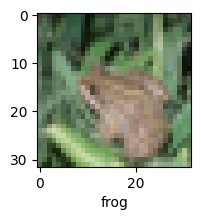

In [45]:
plot_sample(x_test, y_test, 4)

In [46]:
classes[y_classes[4]]

'deer'

In [47]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      1000
           1       0.85      0.76      0.80      1000
           2       0.54      0.60      0.57      1000
           3       0.56      0.42      0.48      1000
           4       0.54      0.70      0.61      1000
           5       0.62      0.56      0.59      1000
           6       0.83      0.73      0.78      1000
           7       0.66      0.78      0.72      1000
           8       0.81      0.79      0.80      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

